In [5]:
from google.colab import files
uploaded = files.upload()


Saving bank-additional.zip to bank-additional.zip


In [6]:
import zipfile
import pandas as pd

with zipfile.ZipFile('bank-additional.zip', 'r') as zip_ref:
    zip_ref.extractall()

df_bank = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

print(df_bank.info())
df_bank.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
# Missing values check
print("Missing values per column:\n", df_bank.isnull().sum())

# Basic stats check
print(df_bank.describe())

# Categorical columns
for col in df_bank.select_dtypes(include='object').columns:
    print(f"Unique values in {col}:", df_bank[col].unique())


Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000

Missing values before cleaning:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
'duration' column dropped.


/tmp/ipython-input-8-229948962.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df_bank, palette='Set2')


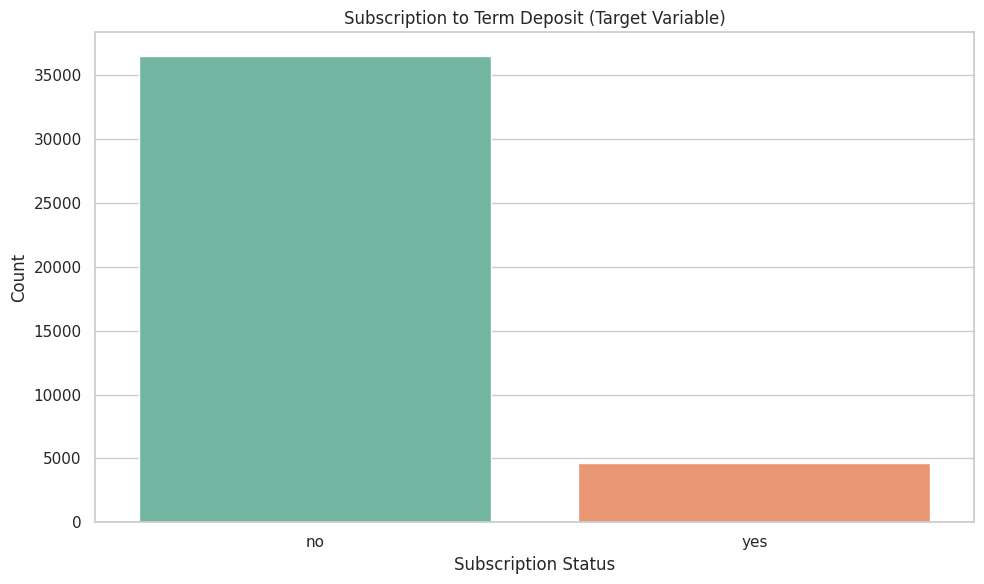

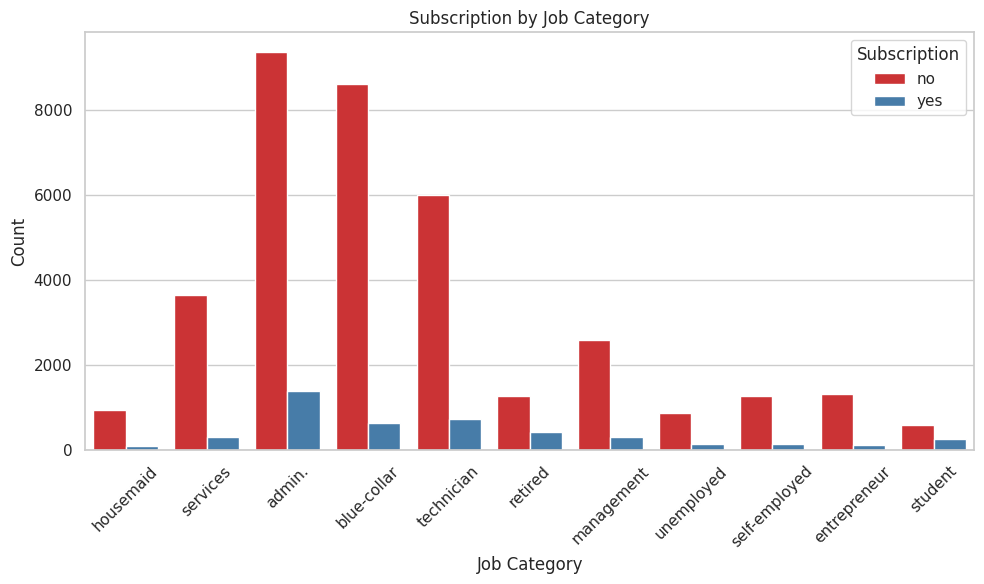

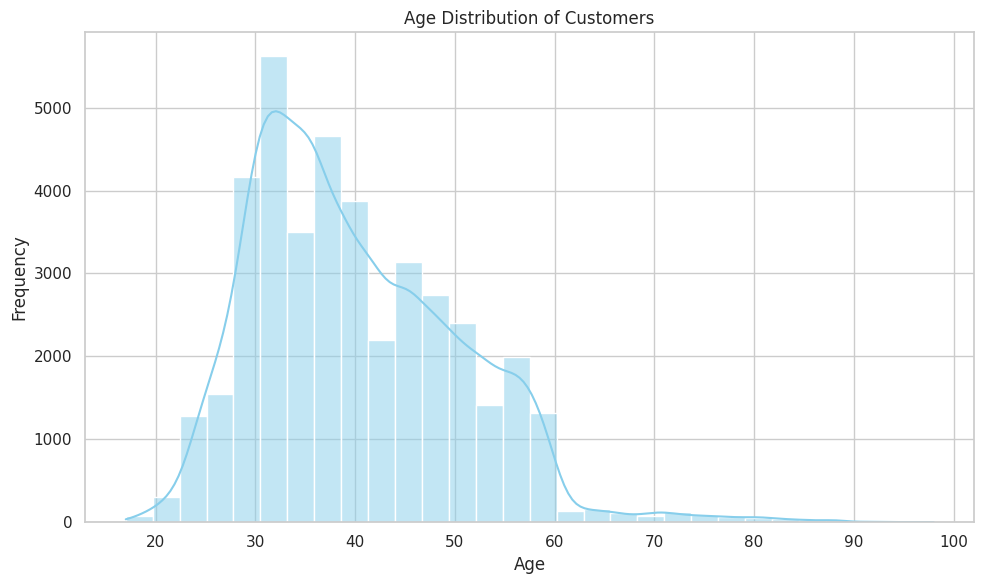

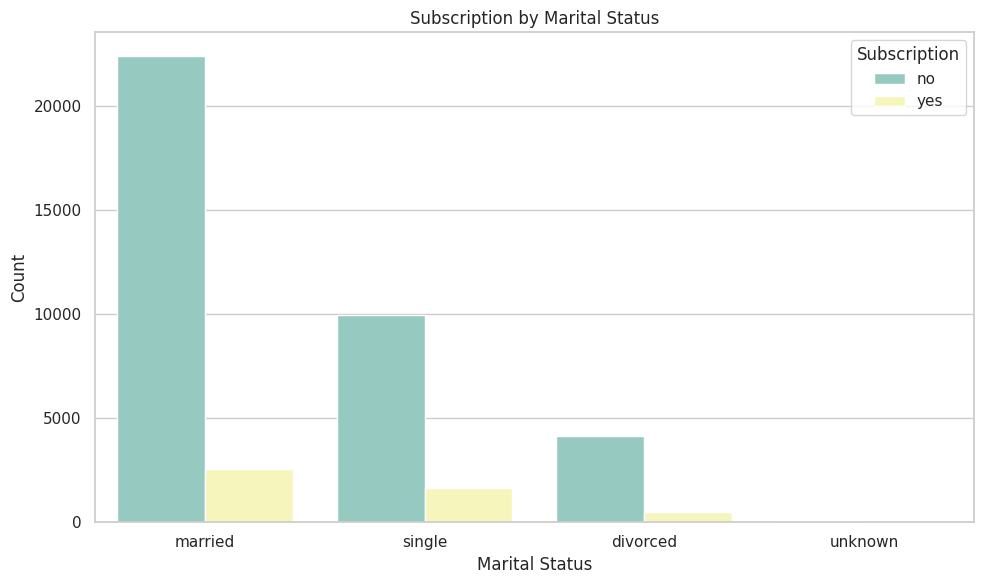

In [8]:
# Check for missing values
print("Missing values before cleaning:\n", df_bank.isnull().sum())

# Remove leakage column
if 'duration' in df_bank.columns:
    df_bank = df_bank.drop(['duration'], axis=1)
    print("'duration' column dropped.")
else:
    print("'duration' column not found; skipping drop.")

# Replace 'unknown' in categorical columns with mode
for col in ['job', 'education', 'contact', 'poutcome']:
    mode_val = df_bank[col].mode()[0]
    df_bank[col] = df_bank[col].replace('unknown', mode_val)

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Target variable distribution
plt.figure()
sns.countplot(x='y', data=df_bank, palette='Set2')
plt.title('Subscription to Term Deposit (Target Variable)')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Job vs Subscription
plt.figure()
sns.countplot(x='job', hue='y', data=df_bank, palette='Set1', dodge=True)
plt.title('Subscription by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()

# Age distribution
plt.figure()
sns.histplot(df_bank['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Marital status vs Subscription
plt.figure()
sns.countplot(x='marital', hue='y', data=df_bank, palette='Set3', dodge=True)
plt.title('Subscription by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscription')
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Encoding categorical columns
cat_cols = df_bank.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", cat_cols)

# Use LabelEncoder for all categorical variables
le = LabelEncoder()
for col in cat_cols:
    df_bank[col] = le.fit_transform(df_bank[col])

# Prepare features (X) and target (y)
X = df_bank.drop('y', axis=1)
y = df_bank['y']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Categorical columns to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Accuracy on test data: 0.9015537751881525

Confusion Matrix:
 [[7234   76]
 [ 735  193]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.72      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.81      0.60      0.63      8238
weighted avg       0.89      0.90      0.88      8238



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
import numpy as np

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=np.abs, ascending=False)

print(coefficients.head(10))


           Feature  Coefficient
7          contact    -0.523416
15  cons.price.idx     0.450294
13        poutcome     0.307857
14    emp.var.rate    -0.297815
4          default    -0.257336
12        previous    -0.234930
2          marital     0.152187
8            month    -0.079324
9      day_of_week     0.068502
10        campaign    -0.061739


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store model scores
model_scores = {}

# Decision Tree ---
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
model_scores["Decision Tree"] = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", model_scores["Decision Tree"])
print(classification_report(y_test, dt_pred))

# Random Forest ---
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
model_scores["Random Forest"] = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", model_scores["Random Forest"])
print(classification_report(y_test, rf_pred))

# K-Nearest Neighbors ---
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
model_scores["KNN"] = accuracy_score(y_test, knn_pred)
print("KNN Accuracy:", model_scores["KNN"])
print(classification_report(y_test, knn_pred))

# --- Compare All Models ---
print("\n--- Model Comparison ---")
for model, score in model_scores.items():
    print(f"{model}: {score:.4f}")


Decision Tree Accuracy: 0.8491138625880068
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7310
           1       0.34      0.36      0.35       928

    accuracy                           0.85      8238
   macro avg       0.63      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238

Random Forest Accuracy: 0.8962126729788784
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7310
           1       0.58      0.30      0.39       928

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

KNN Accuracy: 0.8935421218742413
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7310
           1       0.56      0.28      0.37       928

    accuracy                           0.89      8238
   macro 

In [12]:
from sklearn.model_selection import GridSearchCV


In [13]:
# Parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# GridSearchCV setup
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters (Random Forest):", grid_rf.best_params_)
print("Best cross-validation score (Random Forest):", grid_rf.best_score_)

# Evaluate on test data
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Test Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Best parameters (Random Forest): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score (Random Forest): 0.8993930197268589
Test Accuracy (Random Forest): 0.9016751638747269
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.68      0.24      0.36       928

    accuracy                           0.90      8238
   macro avg       0.79      0.61      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [14]:
# Parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# GridSearchCV setup
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters (Logistic Regression):", grid_lr.best_params_)
print("Best cross-validation score (Logistic Regression):", grid_lr.best_score_)

# Evaluate on test data
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Best parameters (Logistic Regression): {'C': 0.01, 'solver': 'lbfgs'}
Best cross-validation score (Logistic Regression): 0.900060698027314
Test Accuracy (Logistic Regression): 0.9019179412478757
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.73      0.20      0.32       928

    accuracy                           0.90      8238
   macro avg       0.82      0.60      0.63      8238
weighted avg       0.89      0.90      0.88      8238



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


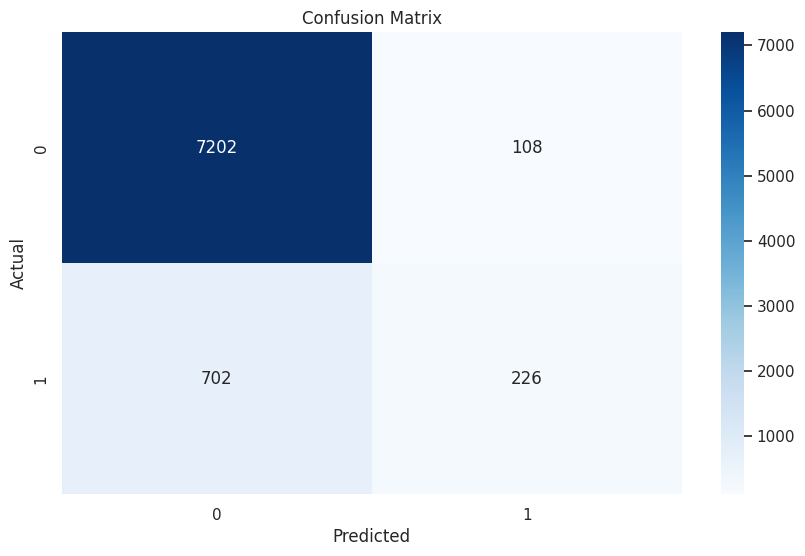

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # use y_pred_lr if using Logistic Regression

# Plot heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


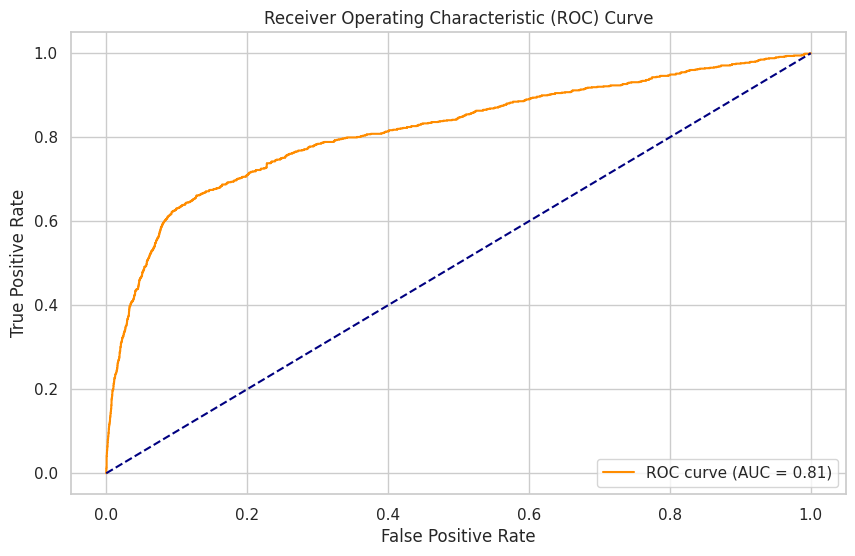

In [16]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = best_rf.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Train model on resampled data
model = LogisticRegression(max_iter=5000)
model.fit(X_resampled, y_resampled)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [24]:
import joblib
joblib.dump(best_rf, 'best_random_forest_model.pkl')


['best_random_forest_model.pkl']

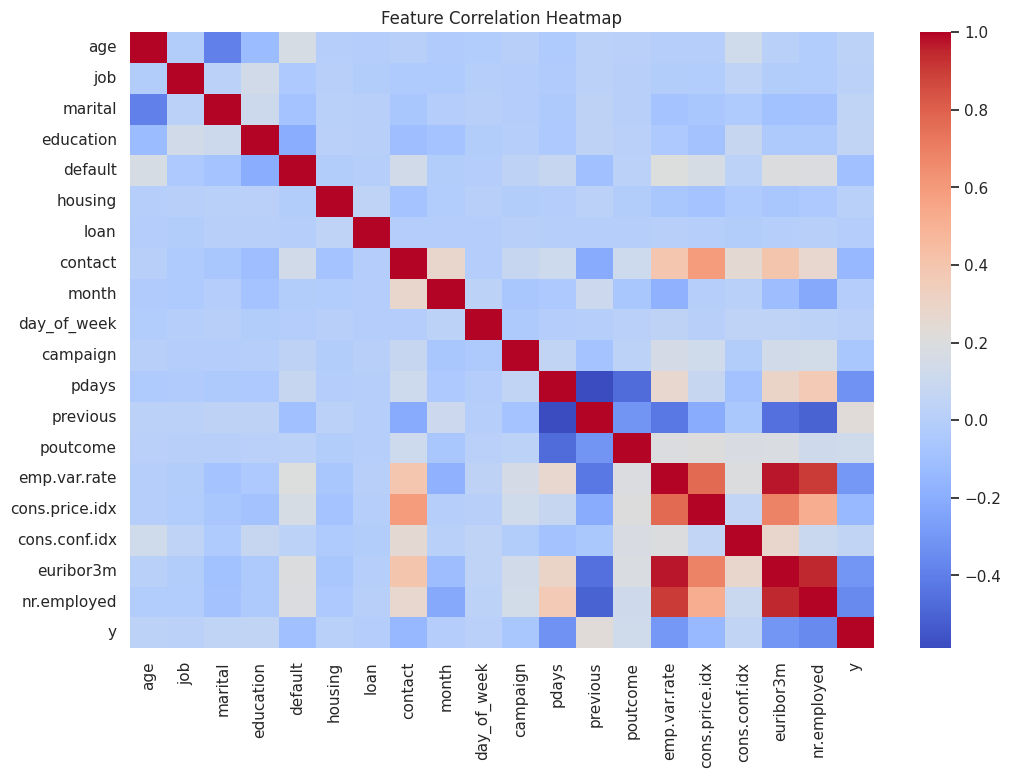

In [25]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(df_bank.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


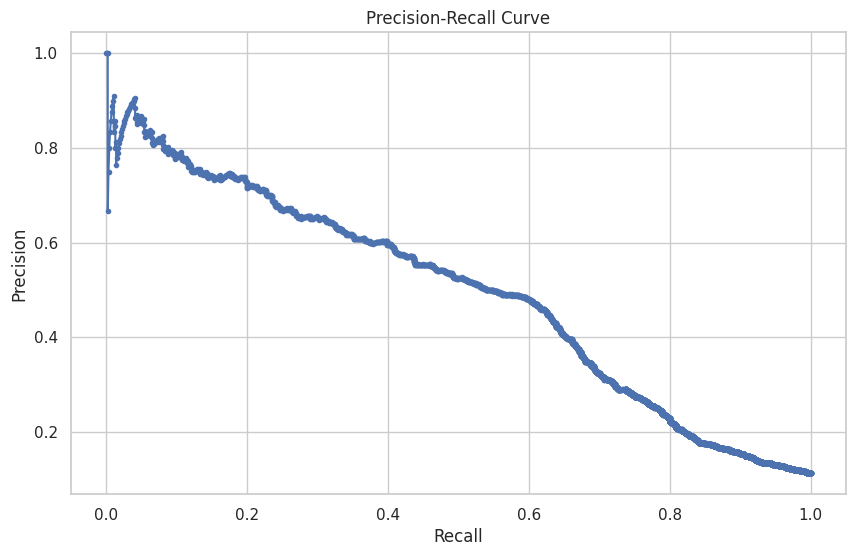

In [26]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [27]:
df_bank.to_csv('cleaned_bank_data.csv', index=False)


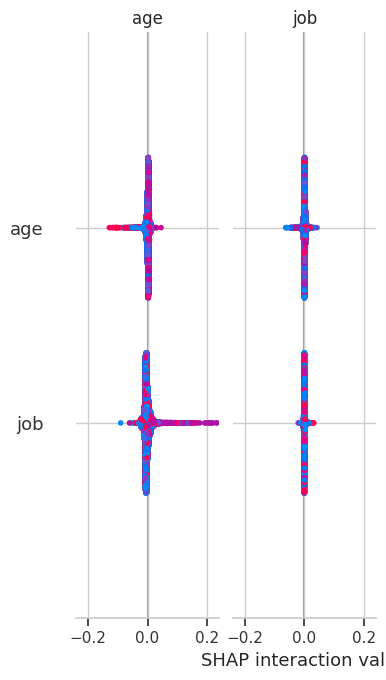

In [29]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

if isinstance(shap_values, list):
    # binary classification
    shap.summary_plot(shap_values[1], X_test)
else:
    shap.summary_plot(shap_values, X_test)
